In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import io
import statsmodels.formula.api as smf
import scipy.stats as stats

# List 5. Задача 4.1

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
df

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.000000,0.000000,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.000000,0.000000,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.000000,0.000000,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936
3,30,0,4,0.000000,0.000000,12,42500,1,1,3211,...,1,3786,0,3786,0,12,0,12,9.619998,900
4,64,0,5,0.000000,0.000000,14,2500,1,1,4052,...,1,2580,0,2580,0,44,0,33,2.750000,4096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,45,0,702,0.182331,0.030075,12,5500,1,0,5069,...,1,2026,0,2026,0,27,0,18,NaN,2025
702,34,0,703,0.182331,0.030075,10,2500,0,0,5885,...,0,675,1,465,210,18,0,4,NaN,1156
703,37,0,704,0.182331,0.030075,12,3500,1,0,4719,...,1,1851,0,1851,0,19,0,17,NaN,1369
704,54,0,705,0.182331,0.030075,17,32500,1,0,5149,...,1,1961,1,1481,480,31,0,22,NaN,2916


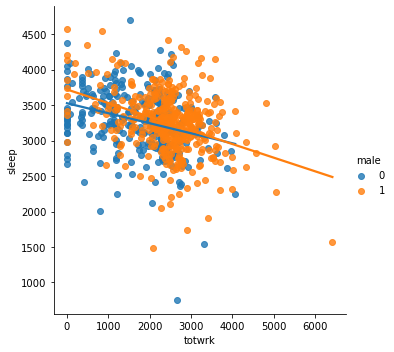

In [4]:
# ci-доверительный интервал
# hue - сортировка по определенной переменной
sns.lmplot(data=df, x='totwrk', y='sleep', ci=None, hue='male')

In [5]:
#Разбиваем датасет на 2 разных для проведения теста "Чоу"
# Определим датафрейм
sleep_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/sleep75.csv')
sleep_df['sleep60'] = sleep_df['sleep']/60 # создадим столбец часов времени
# Отфильтруем датафрейм по гендерному признаку
sleep_male = sleep_df[sleep_df['male']==1] # Датафрейм для мужчин
sleep_female = sleep_df[sleep_df['male']==0] # Датафрейм дла женщин

In [7]:
slp = smf.ols(data= sleep_df, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_ml = smf.ols(data= sleep_male, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()
slp_fml = smf.ols(data= sleep_female, formula='sleep60~totwrk+age+I(age**2)+south +smsa +marr').fit()

In [8]:
# F наблюдаемое
F_obs = (slp.ssr - (slp_ml.ssr+slp_fml.ssr))/(slp_ml.ssr+slp_fml.ssr)*(len(sleep_male)+len(sleep_female)-2*7)/(7)
F_obs

1.5506147376999337

In [9]:
alpha = 0.01
stats.f.ppf(1-alpha, 7,len(sleep_female) + len(sleep_male) - 2*7)

2.6651528022423494

### Вывод:
$F_{obs}<F_{cr}$, данные согласуются с нулевой гипотезой. Структурные различия незначимы - в целом для мужчин и женщин сон по времени один и тот же.

# Задача 4.4

In [17]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage1.csv')
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [19]:
# Отфильтруем датафрейм по гендерному признаку 
df_married  =  df[df [ 'married' ] == 1 ]  # Датафрейм для женатых 
df_notmarried  =  df [ df [ 'married' ] == 0 ]  # Датафрейм дла неженатых

In [39]:
df['wage_Log'] = np.log(df['wage'])
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,wage_Log,exper_Log
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,1.131402,4,0,1.131402,0.693147
1,3.24,12,22,2,0,1,1,3,1,0,...,1,0,0,0,1,1.175573,484,4,1.175573,3.091042
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1.098612,4,0,1.098612,0.693147
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,1,0,1.791759,1936,784,1.791759,3.784190
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,1.667707,49,4,1.667707,1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,1,1,0,0,2.708050,196,4,2.708050,2.639057
522,2.27,10,2,0,0,1,0,3,0,0,...,0,0,1,0,0,0.819780,4,0,0.819780,0.693147
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,1,0,0,1.541159,169,324,1.541159,2.564949
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,2.447551,25,1,2.447551,1.609438


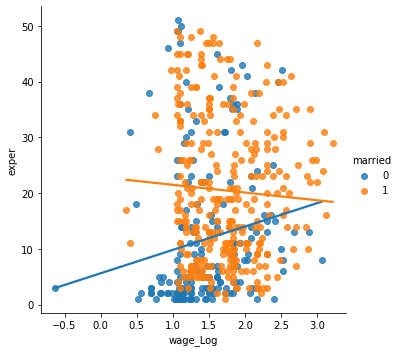

In [38]:
# ci-доверительный интервал
# hue - сортировка по определенной переменной
sns.lmplot(data=df, x='wage_Log', y='exper', ci=None, hue='married')

In [ ]:
# Руслан Юрьевич, это нормально, что такой график получился "широкий" даже с учетом примененного логарифма 

$$
H_0 : \beta_{married} = \beta_{notmarried}; \ \sigma_1^2 = \sigma_2^2
$$

In [25]:
wage_fitted = smf.ols(data=df, formula='np.log(wage)~exper+I(exper**2)+female+smsa').fit()
wage_fit_mar = smf.ols(data= df_married,  formula='np.log(wage)~exper+I(exper**2)+female+smsa').fit()
wage_fit_notmar = smf.ols(data = df_notmarried, formula='np.log(wage)~exper+I(exper**2)+female+smsa').fit()

In [33]:
# F-наблюдаемое
F_obs = (wage_fitted.ssr - (wage_fit_mar.ssr+wage_fit_notmar.ssr))/(wage_fit_mar.ssr+wage_fit_notmar.ssr) * (len(df_married)+len(df_notmarried)-2*5)/(5)
F_obs.round(3)

6.554

In [32]:
F_cr = stats.f.ppf(1-0.05, 5, len(df_married)+len(df_notmarried)-2*5)
F_cr.round(3)

2.231

### Вывод: гипотеза $Н_0$ отвергается. Коэффициенты значимы, и доходы отличаются в зависимости от того, женат ты или нет.

# List 6. Довериельные интервалы

## Задача 1.1 

In [40]:
data_string = '''totwrk                       -0.169***         
                              (0.018)          
                                               
age                           2.689*           
                              (1.469)          
                                               
south                        101.568**         
                             (41.837)          
                                               
male                         87.669**          
                             (35.104)          
                                               
smsa                         -54.748*          
                             (33.123)          
                                               
yngkid                        -13.962          
                             (50.341)          
                                               
marr                          31.211           
                             (42.233)          
                                               
Constant                    3450.913***        
                             (80.726)  '''

In [41]:
# Строку с данными можно разбить на 8 подстрок в 3 мя элементами в каждой, разделённых различными количеством пробелом.
# С этим справится метод reshape() из библиотеки numpy
# strip - удаляет из строки все ненужные элементы
# split - размещает отдельно по отдельным строкам
np.reshape(data_string.strip().split(), (8,3))

array([['totwrk', '-0.169***', '(0.018)'],
       ['age', '2.689*', '(1.469)'],
       ['south', '101.568**', '(41.837)'],
       ['male', '87.669**', '(35.104)'],
       ['smsa', '-54.748*', '(33.123)'],
       ['yngkid', '-13.962', '(50.341)'],
       ['marr', '31.211', '(42.233)'],
       ['Constant', '3450.913***', '(80.726)']], dtype='<U11')

In [42]:
df = pd.DataFrame(np.reshape(data_string.strip().split(), (8,3) ), columns=['Coeff','Est str','std.err. str'])
df

,Coeff,Est str,std.err. str
0,totwrk,-0.169***,(0.018)
1,age,2.689*,(1.469)
2,south,101.568**,(41.837)
3,male,87.669**,(35.104)
4,smsa,-54.748*,(33.123)
5,yngkid,-13.962,(50.341)
6,marr,31.211,(42.233)
7,Constant,3450.913***,(80.726)


In [43]:
# оценки. str(- строка).extract( - извлекает), astype - преобразование в число
df['Estimate_numb'] = df['Est str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
# ошибки
df['Std.error'] = df['std.err. str'].str.extract(r'([-+]?\d+.\d+)').astype(float)
df

,Coeff,Est str,std.err. str,Estimate_numb,Std.error
0,totwrk,-0.169***,(0.018),-0.169,0.018
1,age,2.689*,(1.469),2.689,1.469
2,south,101.568**,(41.837),101.568,41.837
3,male,87.669**,(35.104),87.669,35.104
4,smsa,-54.748*,(33.123),-54.748,33.123
5,yngkid,-13.962,(50.341),-13.962,50.341
6,marr,31.211,(42.233),31.211,42.233
7,Constant,3450.913***,(80.726),3450.913,80.726


In [44]:
alpha = 0.1
t_cr=stats.t.ppf(1-alpha/2, 706-8)
t_cr

1.6470395952054095

In [45]:
df['low']=df['Estimate_numb']-t_cr*df['Std.error']
df['up']=df['Estimate_numb']+t_cr*df['Std.error']
df

,Coeff,Est str,std.err. str,Estimate_numb,Std.error,low,up
0,totwrk,-0.169***,(0.018),-0.169,0.018,-0.198647,-0.139353
1,age,2.689*,(1.469),2.689,1.469,0.269499,5.108501
2,south,101.568**,(41.837),101.568,41.837,32.660804,170.475196
3,male,87.669**,(35.104),87.669,35.104,29.851322,145.486678
4,smsa,-54.748*,(33.123),-54.748,33.123,-109.302893,-0.193107
5,yngkid,-13.962,(50.341),-13.962,50.341,-96.875620,68.951620
6,marr,31.211,(42.233),31.211,42.233,-38.348423,100.770423
7,Constant,3450.913***,(80.726),3450.913,80.726,3317.954082,3583.871918


## Задача 1.3

In [71]:
df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/Electricity.csv')
df

,cost,q,pl,sl,pk,sk,pf,sf
0,0.2130,8.0,6869.47,0.3291,64.945,0.4197,18.000,0.2512
1,3.0427,869.0,8372.96,0.1030,68.227,0.2913,21.067,0.6057
2,9.4059,1412.0,7960.90,0.0891,40.692,0.1567,41.530,0.7542
3,0.7606,65.0,8971.89,0.2802,41.243,0.1282,28.539,0.5916
4,2.2587,295.0,8218.40,0.1772,71.940,0.1623,39.200,0.6606
...,...,...,...,...,...,...,...,...
153,6.8293,946.6,10642.16,0.0883,43.600,0.1914,51.463,0.7203
154,3.7605,377.0,7432.24,0.2117,74.120,0.2274,33.436,0.5609
155,3.9822,391.0,5826.04,0.1926,78.288,0.0924,44.633,0.7151
156,30.1880,5317.0,9586.63,0.0845,78.008,0.2009,41.840,0.7147


In [72]:
fitted = smf.ols(data=df, formula='np.log(cost)~np.log(q)+I(np.log(q)**2)+np.log(pl)+np.log(pk)+np.log(pf)').fit()
fitted.summary(alpha=0.01).tables[1]

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,-6.7387,0.706,-9.541,0.000,-8.581,-4.896
np.log(q),0.4030,0.032,12.734,0.000,0.320,0.486
I(np.log(q) ** 2),0.0304,0.002,14.024,0.000,0.025,0.036
np.log(pl),0.1461,0.070,2.073,0.040,-0.038,0.330
np.log(pk),0.1571,0.058,2.721,0.007,0.007,0.308
np.log(pf),0.6847,0.043,16.043,0.000,0.573,0.796


In [73]:
data =	'''coef	std.err	t	P>|t|	[0.005	0.995]
Intercept	-6.7387	0.706	-9.541	0.000	-8.581	-4.896
np.log(q)	0.4030	0.032	12.734	0.000	0.320	0.486
I(np.log(q)^2)	0.0304	0.002	14.024	0.000	0.025	0.036
np.log(pl)	0.1461	0.070	2.073	0.040	-0.038	0.330
np.log(pk)	0.1571	0.058	2.721	0.007	0.007	0.308
np.log(pf)	0.6847	0.043	16.043	0.000	0.573	0.796'''

In [74]:
# создаём DataFrame
df_mini = pd.read_csv(io.StringIO(data), sep='\s+')
df_mini

,coef,std.err,t,P>|t|,[0.005,0.995]
Intercept,-6.7387,0.706,-9.541,0.000,-8.581,-4.896
np.log(q),0.4030,0.032,12.734,0.000,0.320,0.486
I(np.log(q)^2),0.0304,0.002,14.024,0.000,0.025,0.036
np.log(pl),0.1461,0.070,2.073,0.040,-0.038,0.330
np.log(pk),0.1571,0.058,2.721,0.007,0.007,0.308
np.log(pf),0.6847,0.043,16.043,0.000,0.573,0.796


In [75]:
#t critical
alpha = 0.01
t_cr=stats.t.ppf(1-alpha/2, 158-6)
t_cr

2.608560883167519

In [76]:
#формируем доверительный интервал
df_mini['low']=df_mini['coef']-t_cr*df_mini['std.err']
df_mini['up']=df_mini['coef']+t_cr*df_mini['std.err']
df_mini

,coef,std.err,t,P>|t|,[0.005,0.995],low,up
Intercept,-6.7387,0.706,-9.541,0.000,-8.581,-4.896,-8.580344,-4.897056
np.log(q),0.4030,0.032,12.734,0.000,0.320,0.486,0.319526,0.486474
I(np.log(q)^2),0.0304,0.002,14.024,0.000,0.025,0.036,0.025183,0.035617
np.log(pl),0.1461,0.070,2.073,0.040,-0.038,0.330,-0.036499,0.328699
np.log(pk),0.1571,0.058,2.721,0.007,0.007,0.308,0.005803,0.308397
np.log(pf),0.6847,0.043,16.043,0.000,0.573,0.796,0.572532,0.796868


## Задание 2.2

In [81]:
fitted = smf.ols(data=df, formula='np.log(cost)~np.log(q)+I(np.log(q)**2)+np.log(pl)+I(np.log(pl)**2)+np.log(pk)+I(np.log(pk)**2)+np.log(pf)+I(np.log(pf)**2)').fit()
fitted.summary(alpha=0.01).tables[1]

,coef,std err,t,P>|t|,[0.005,0.995]
Intercept,-44.4035,23.432,-1.895,0.060,-105.542,16.735
np.log(q),0.3963,0.032,12.333,0.000,0.312,0.480
I(np.log(q) ** 2),0.0309,0.002,14.020,0.000,0.025,0.037
np.log(pl),8.3334,5.330,1.564,0.120,-5.573,22.240
I(np.log(pl) ** 2),-0.4554,0.297,-1.535,0.127,-1.230,0.319
np.log(pk),0.4362,1.522,0.287,0.775,-3.536,4.408
I(np.log(pk) ** 2),-0.0360,0.187,-0.192,0.848,-0.525,0.453
np.log(pf),0.8988,0.616,1.459,0.147,-0.709,2.507
I(np.log(pf) ** 2),-0.0305,0.093,-0.329,0.743,-0.272,0.211


In [92]:
data = '''coef	std.err	t	P>|t|	[0.005	0.995]
Intercept	-44.4035	23.432	-1.895	0.060	-105.542	16.735
np.log(q)	0.3963	0.032	12.333	0.000	0.312	0.480
I(np.log(q)^2)	0.0309	0.002	14.020	0.000	0.025	0.037
np.log(pl)	8.3334	5.330	1.564	0.120	-5.573	22.240
I(np.log(pl)^2)	-0.4554	0.297	-1.535	0.127	-1.230	0.319
np.log(pk)	0.4362	1.522	0.287	0.775	-3.536	4.408
I(np.log(pk)^2)	-0.0360	0.187	-0.192	0.848	-0.525	0.453
np.log(pf)	0.8988	0.616	1.459	0.147	-0.709	2.507
I(np.log(pf)^2)	-0.0305	0.093	-0.329	0.743	-0.272	0.211'''

In [93]:
# создаём DataFrame
df_mini = pd.read_csv(io.StringIO(data), sep='\s+')
df_mini

,coef,std.err,t,P>|t|,[0.005,0.995]
Intercept,-44.4035,23.432,-1.895,0.060,-105.542,16.735
np.log(q),0.3963,0.032,12.333,0.000,0.312,0.480
I(np.log(q)^2),0.0309,0.002,14.020,0.000,0.025,0.037
np.log(pl),8.3334,5.330,1.564,0.120,-5.573,22.240
I(np.log(pl)^2),-0.4554,0.297,-1.535,0.127,-1.230,0.319
np.log(pk),0.4362,1.522,0.287,0.775,-3.536,4.408
I(np.log(pk)^2),-0.0360,0.187,-0.192,0.848,-0.525,0.453
np.log(pf),0.8988,0.616,1.459,0.147,-0.709,2.507
I(np.log(pf)^2),-0.0305,0.093,-0.329,0.743,-0.272,0.211


In [94]:
#t critical
alpha = 0.01
t_cr=stats.t.ppf(1-alpha/2, 158-9)
t_cr

2.6092279073321927

In [95]:
df_mini['Significance']=df_mini.apply(lambda x: 'значим' if abs(x['t'])>t_cr else 'незначим',axis=1)
df_mini

,coef,std.err,t,P>|t|,[0.005,0.995],Significance
Intercept,-44.4035,23.432,-1.895,0.060,-105.542,16.735,незначим
np.log(q),0.3963,0.032,12.333,0.000,0.312,0.480,значим
I(np.log(q)^2),0.0309,0.002,14.020,0.000,0.025,0.037,значим
np.log(pl),8.3334,5.330,1.564,0.120,-5.573,22.240,незначим
I(np.log(pl)^2),-0.4554,0.297,-1.535,0.127,-1.230,0.319,незначим
np.log(pk),0.4362,1.522,0.287,0.775,-3.536,4.408,незначим
I(np.log(pk)^2),-0.0360,0.187,-0.192,0.848,-0.525,0.453,незначим
np.log(pf),0.8988,0.616,1.459,0.147,-0.709,2.507,незначим
I(np.log(pf)^2),-0.0305,0.093,-0.329,0.743,-0.272,0.211,незначим
